In [1]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import GradientBoostingRegressor

path = Path('titanic')

df = pd.read_csv(path/'train.csv')


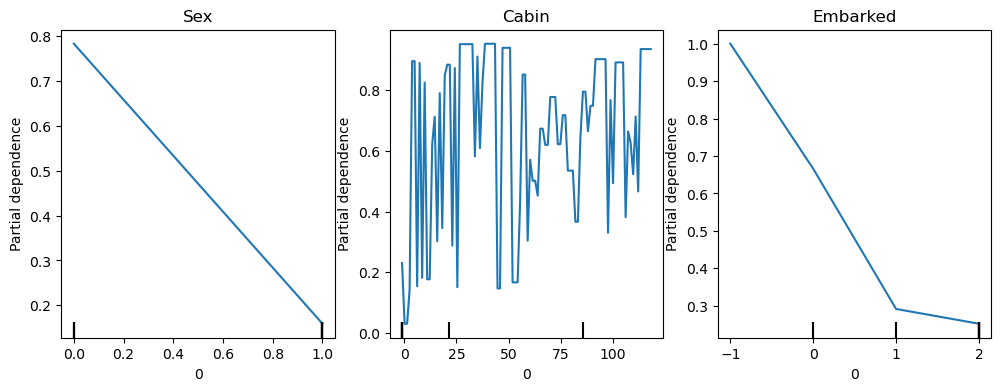

In [17]:
# We use partial dependence to find out how corelated the dependent and an independent variables are.

cats = ['Sex','Cabin','Embarked']
y = df['Survived']  # dependent variable
fig, axs = plt.subplots(1,3,figsize=(12, 4))

for i, cat in enumerate(cats):
    df[cat] = pd.Categorical(df[cat])
    X = df[cat].cat.codes.to_frame()

    # Fit a GradientBoostingRegressor model
    clf = GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, loss='huber', random_state=1)
    clf.fit(X, y)

    # Create the partial dependence plot
    display = PartialDependenceDisplay.from_estimator(clf, X, features=[0], ax=axs[i])
    axs[i].set_title(cat)

plt.show()